# Lecture 1: Functions and notations

Some stuff associated with the first MCMCS lecture on functions and notations

In [2]:
# Import some libraries (numpy: see http://www.numpy.org/; matplotlib: see https://matplotlib.org/)
# You will probably almost always want to import those. 
# np and plt are standard short names for those libraries
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

### Functions

Let's talk functions... A function can be a valid Matlab/Python function (e.g., func2 below) it may not be a valid mathematical function. func1 below is a valid mathematical function. Why? 

In [3]:
# Create some input
x=np.linspace(-10,10,41)
x=np.sort(np.hstack((x,x,x))) # same set of inputs repeated 3 times

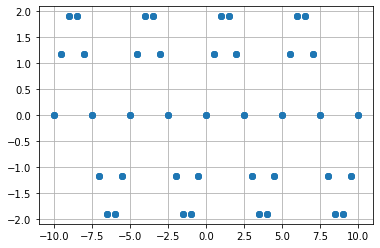

In [4]:
def func1(inputval):
    return 2.*np.sin(2.0*np.pi/5.*inputval)

y=func1(x)
plt.plot(x,y,'o')
plt.grid()
plt.show()

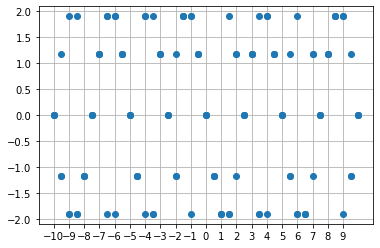

In [5]:
def func2(inputval):
    outputval=np.zeros(len(inputval))
    for i in range(len(inputval)):
        if np.random.randn(1)>0.5:
            outputval[i]=2.*np.sin(2.0*np.pi/5.*inputval[i])
        else:
            outputval[i]=-2.*np.sin(2.0*np.pi/5.*inputval[i])
    return outputval

y=func2(x)
fig = plt.figure()
ax = fig.gca()
ax.set_xticks(np.arange(-10, 10, 1.0))
plt.plot(x,y,'o')
plt.grid()
plt.show()

### Analytical definition of the sine function

What does sin(x) actually mean? 

The series decomposition of the sine function is: $$\sum_{n=0}^{\infty} \frac{(-1)^n}{(2n+1)!}x^{2n+1}$$ where $!$ denotes the factorial function ($n!=n(n-1)(n-2)...1$).

We will discuss later where that comes from. 


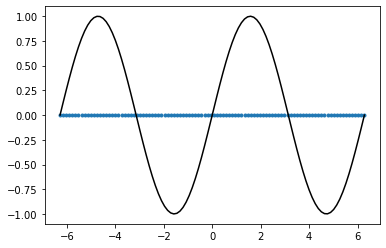

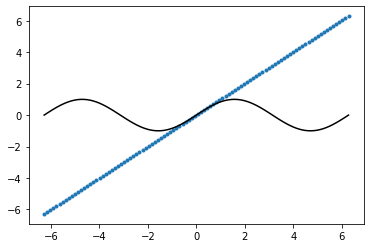

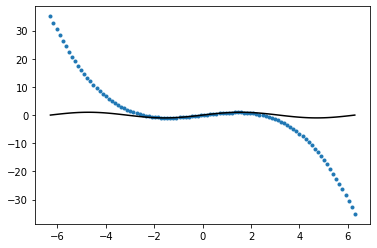

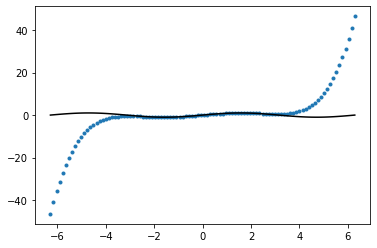

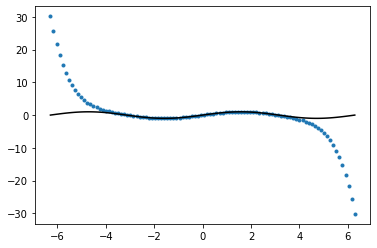

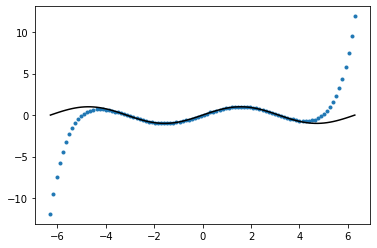

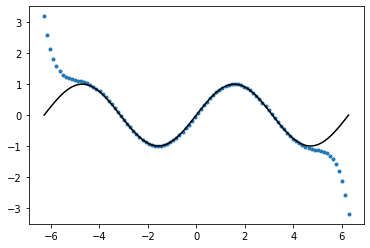

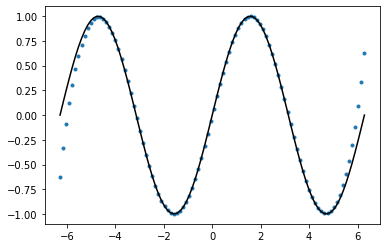

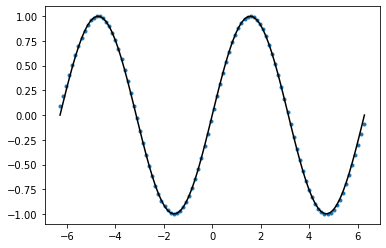

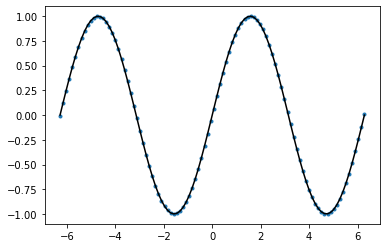

In [6]:
x=np.linspace(-2*np.pi,2*np.pi,100)


# i-th order sine series decomposition
from math import factorial
def sineseries(x,order):
    y=np.zeros(len(x))
    for i in range(order):
        y=y+(-1.)**i/factorial(2*i+1)*x**(2*i+1)
    return y

for i in range(10):
    plt.figure()
    plt.plot(x,sineseries(x,i),'.')
    plt.plot(x,np.sin(x),'k')


### Visualisation

Let's talk visualisation and also which axis does what. Code to plot function has been shown above. Here, my focus is to make sure not to be overly dependent on assumptions as to what x and y mean, whether x is the horizontal axis, etc... It's very trivial but I see too many students automatically assuming that x is the independent variable and y is the dependent variable. x and y are dummy variables. They may as well be called 'courgettes' and 'aubergines'. 

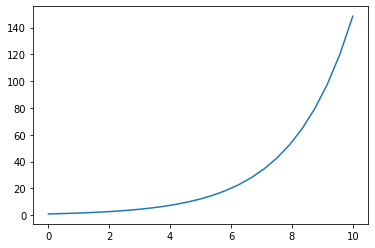

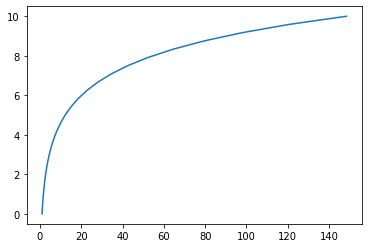

In [7]:

def myfunc(someinput):
    return np.exp(0.5*someinput)

courgette = np.linspace(0,10,25)
aubergine = myfunc(courgette)
plt.figure()
plt.plot(courgette,aubergine)

plt.figure()
plt.plot(aubergine,courgette)

Beware of plotting mode and spacing. It's not just about cosmetics! 

Below I illustrate how not being too careful about spacing (how densely the curve/graph is sampled) and plotting mode (using lines instead of points) can lead to problematic output. One such example is so-called aliasing. Consider a periodic function (input arguments are t, the times at which the periodic signal is sampled and freq the frequency of the signal -- here a simple cosine function). 

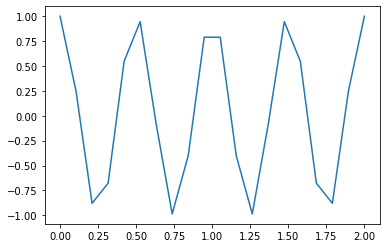

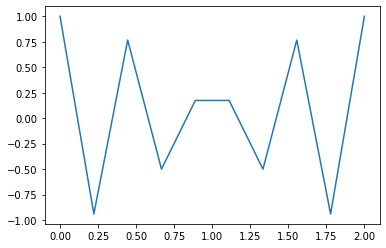

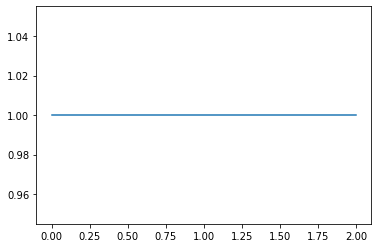

In [8]:
def aperiodicfunction(t,freq):
    return np.cos(2.*np.pi*freq*t)

t=np.linspace(0,2,20) # 20 points over 2 seconds
y=aperiodicfunction(t,2.0)
plt.figure()
plt.plot(t,y,'-')


t=np.linspace(0,2,10) # 10 points over 2 seconds
y=aperiodicfunction(t,2.0)
plt.figure()
plt.plot(t,y,'-')


t=np.linspace(0,2,5) # 5 points over 2 seconds
y=aperiodicfunction(t,2.0)
plt.figure()
plt.plot(t,y,'-')



### Using graphs to solve equalities



In [11]:
# Here I am using plotly (https://plot.ly/)
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly.graph_objs import Scatter
print(__version__) # requires >= 1.9.0

init_notebook_mode(connected=True)


# Let's find intersection of two functions
x=np.linspace(0,5,100)
y1=x
y2=np.exp((x-1.5)/2)

trace0=Scatter(x=x,y=y1)
trace1=Scatter(x=x,y=y2)
trace=[trace0,trace1]
iplot(trace)

4.4.1


In [ ]:
# Compare your finding with a solver 
from scipy.optimize import fsolve
def myfunc(x):
    return x-np.exp((x-1.5)/2)

print(fsolve(myfunc,2.)) # Need to seed the search (why?)
print(fsolve(myfunc,5.))

### Surfaces

Example of surface plot (functions of two variables)

There are numerous ways of improving this plot. Consult the documentation (https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html)

In [ ]:
def mysurface(x,y):
    return x*np.exp(-x**2-y**2)

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = y = np.arange(-3.0, 3.0, 0.05) # NB: an alternative to using np.linspace
X, Y = np.meshgrid(x, y) # NB: This creates a structure from which all possible coordinates (x,y) can be accessed
z = np.array([mysurface(x,y) for x,y in zip(np.ravel(X), np.ravel(Y))])
Z = z.reshape(X.shape)

ax.plot_surface(X, Y, Z)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

### Straight lines! 

A straightline is defined by an equation of the type ax+b (see function below). a defines the slope (or gradient). b defines the intercept (where the line crosses the y axis). Experiment with the values of a and b. In example below a = 0 therefore we have an horizontal straightline. **Exercise**: What is the equation of a vertical straight line? Is it a function? How would you implement it? 

In [ ]:
def astraightline(x,a,b):
    return a*x+b

In [ ]:
plt.figure()
x=np.linspace(-2,2,2) # It's a straight line... we only need two points! 
y=astraightline(x,0,3)
plt.plot(x,y,'-',c='blue') # plot in blue

if 1: # with 0, see blue, with 1, see red
    x=np.linspace(-2,2,3) # We can use 3, won't make a difference though 
    y=astraightline(x,0,3)
    plt.plot(x,y,'-',c='red') # plot in red


### Summations and products

Let's implement the following double summation: $y=\sum_{i=0}^{i=4}\sum_{j=0}^{j=5}1$. Think about what this should be doing. Predict the output and compare with the below. 

In [ ]:
y=0 # that has to be the starting point (it is the neutral element)
for i in range(4):
    for j in range(5):
        y+=1
print(y)

Is that what you expected? Well, it shouldn't. The first sum actually is performed 5 times (i should take values 0,1,2,3 and 4) and the second sum should be performed 6 times (j should take values 0,1,2,3,4,5 and 6). What is happening here is that range (as well as np.arange) open a half-closed interval. range(5) returns the indices for 5 items. So correct implementation here is: 

In [ ]:
y=0 # that has to be the starting point (it is the neutral element)
for i in range(5):
    for j in range(6):
        y+=1
print(y)

I leave it to you to write the a product. It's similar in structure but you will have to think about the neutral element. 

## A bit about exponentials



In [ ]:
# Generate some x (by steps of 0.05) and corresponding y=e^x values. 

x=np.arange(0,10,0.05)
y=np.exp(x)
plt.figure()
plt.plot(x,y,c='blue')


# Now find out by how much y changes for each steps of 0.05
# and plot that
diffy=np.diff(y)
plt.figure()
plt.plot(x,np.insert(diffy,0,0),c='red')


What do you observe? 

### Logarithms

Plotting in log coordinates can be very helpful.
Consider the scenario from the lecture. 
Population count grows like: $2^{t/\tau}$ where t is time and $\tau$ is some time constant
Let's now imagine that we make this process noisy. So at each time step we add a random number drawn from some distribution

In [ ]:
t=np.arange(0,50,0.05)
tau=5.0
n=2**(t/tau)+0.1*np.random.randn(len(t))
plt.plot(t,n)

The trend is very visible but the noise is drawn by the scale of the growth. Let's now plot this in semi-log (vertical axis). **NB** The semilog function uses log10. 

In [ ]:
plt.semilogy(t,n)
print(min(n))


Two things here. First, the noise is now very visible. It is visible at the range where noise dominates (or at least is comparable in size with) growth. At about t=20, noise is insignficant. Second, the data is clearly linear. What is the slope of this line? log(2)/tau (think about it!). Let's superimpose the line y=log(2)/tau t just to be sure. Since we cannot superimpose semilogy and 'normal' plots we need to express it as power of e (it's a bit confusing, I know)
We can talk about it in seminar. 

In [ ]:
plt.semilogy(t,n)
plt.plot(t,np.exp(1)**(np.log(2)/tau*t),c='red')

OK I suspect the last step was very confusing, so let's not use semilogy but instead just plot the log itself. In other words, we plot in the linear domain the log values. That should help. Note we will have an issue with n=0 (the first value) because log(0) is not defined. 

In [ ]:
plt.plot(t,np.log(n))

In this way, the slope of the straight line should be exactly log(2)/tau so let's superimpose y=log(2)/tau t. 

In [ ]:
plt.plot(t,np.log(n),c='blue')
plt.plot(t,np.log(2)/tau*t,c='red')

Et voila! 

Moving on... 

### Very short illustration of Fourier Series

It isn't the place to get into the detail here but let's implement the so-called Fourier series-square wave (see: http://mathworld.wolfram.com/FourierSeries.html). Concretely, we are looking into approximating a step function using: 
$$\frac{4}{\pi}\sum_{n=1,3,5,\cdots}^{\infty}\frac{1}{n}sin\left(\frac{n\pi t}{L}\right)$$ where $L$ is the half the length of the step (the period). In the lecture, $L=\pi$.

In [ ]:
def squarewave(t,period):
    # An easy way to generate a square wave (as per the lecture notes) is by thresholding a sine function
    # I will use a python lambda function for this (useful to learn) followed by list comprehension
    # There are other ways... 
    threshold = lambda x: 1 if x>0 else -1 # defining a thresholding function
    return [threshold(x) for x in np.sin(2*np.pi*t/period)]

t=np.arange(0,10,0.05)
plt.plot(t,squarewave(t,2*np.pi),'-')

In [ ]:
def FourierDecomposition(t,order):
    y=np.zeros(len(t))
    for i in range(order):
        n=(2*i+1)
        y=y+4./np.pi*np.sin(n*t)/n
    return y

for i in range(10):
    plt.figure()
    plt.plot(t,squarewave(t,2*np.pi),'-',c='black')
    plt.plot(t,FourierDecomposition(t,i),'-',c='blue')

In [ ]:
# One last try with a large order value
plt.figure()
plt.plot(t,squarewave(t,2*np.pi),'-',c='black')
plt.plot(t,FourierDecomposition(t,10000),'-',c='blue')

Pretty cool huh?